# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
# el separador de los datos es ';', por lo que se se usa el parámetro sep= ';'
df_instacart_orders = pd.read_csv('files/datasets/instacart_orders.csv', sep= ';') 
df_products = pd.read_csv('files/datasets/products.csv', sep= ';')
df_order_products = pd.read_csv('files/datasets/order_products.csv', sep= ';')
df_aisles = pd.read_csv('files/datasets/aisles.csv', sep= ';')
df_departments = pd.read_csv('files/datasets/departments.csv', sep= ';')

In [3]:
# mostrar información del DataFrame instacart_orders
df_instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame products
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame order_products
# Se emplea el parámetro show_counts=True, ya que contiene muchas filas de datos y se requiere que se muestren los recuentos
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [6]:
# mostrar información del DataFrame
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
# mostrar información del DataFrame
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


## Conclusiones

Los archivos de los datos a pesar que tienen una extensión csv, el separador es un ``';'``, por ello se usó el parámetro ``sep= ';'``.

El DatraFrame ``df_instacart``_orders únicamnete la columna days_since_prior_order tiene datos nulos.  
El DatraFrame ``df_products`` únicamnete la columna product_name tiene datos nulos.  
El DatraFrame ``order_products`` únicamnete la columna add_to_cart_order tiene datos nulos.  
No hay datos nulos en DataFrame ``df_aisles``.  
Tampoco hay datos nulos en DataFrame ``df_departments``.  

En los siguientes pasos se procesarán los datos ausentes, además de analizar si hay datos duplicados.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.  
<span style="color:darkgreen">
Primero se buscarán los valores duplicados en cada DataFrame. Para esto se empleará el método ``duplicated()`` en combinación con ``sum()``. Después se usará el método ``drop_duplicates()`` con ``reset_index(drop=True)`` para reiniciar el índice después de eliminar los duplicados.
Posteriormente en las columnas de cada DataFrame también se buscarán los valores ausentes con el método ``isna()`` con ``sum()``. Se evaluarán estos datos ausentes para determinar con cuál valor reemplazarlos cuando sea pertinente.  
También se revisará el tipo de dato para cada columna, esto se puede hacer con el método ``info()`` o con el atributo ``dtypes``. En donde sea necesario el tipo de dato se cambiará con el método ``astype()`` o si es necesario el método ``to_numeric()``
</span>. 

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
# contar duplicados explícitos para el DataFrame df_instacart_orders
# uso del método duplicated() con sum()
df_instacart_orders.duplicated().sum()

15

In [9]:
# Se filtra el DataFrame con los valores duplicado
df_instacart_orders[df_instacart_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?  
<span style="color:darkgreen">
    Si, hay 15 datos o líneas duplicadas de acuerdo al resultado después de aplicar el método duplicated() y sum() al DataFrame (``df_instacart_orders.duplicated().sum()``).  
    Después de filtrar el DataFrame solo con los valores duplicados se observa que el día (``order_dow``) y la hora (``order_hour_of_day``) en la que se hizo el pedido son los mismos valores en las líneas duplicadas.
</span>.  

In [10]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_instacart_orders[(df_instacart_orders['order_dow'] == 3) & (df_instacart_orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?  
<span style="color:darkgreen">
El resultado podría sugerir que los duplicados ocurrieron probablemente a un error de captura, ya que es un horario nocturno y el factor del cansancio pudo haber influenciado para que se cometiera un error humano.
</span>.  

In [11]:
# Elimina los pedidos duplicados
# Ahora estos 15 valores duplicados se eliminarán con el método drop_duplicates con reset_index(drop=True) 
# para eliminar los duplicados y reiniciar los índices
df_instacart_orders = df_instacart_orders.drop_duplicates().reset_index(drop= True)

In [12]:
# Vuelve a verificar si hay filas duplicadas
df_instacart_orders.duplicated().sum()

0

In [13]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
# Se emplea el parámetro subset= del método duplicated() para buscar duplicados en las columnas de interés
df_instacart_orders.duplicated(subset=['order_id', 'user_id']).sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos  
<span style="color:darkgreen">
Se encontraron duplicados, por lo que se eliminaron con el método ``drop_duplicates()``   
Problamente los duplicados se debieron a un error de captura.  
No se hizo cambio de tip de dato en ninguna columna, las columnas de ID su tipo de dato es entero.
</span>.  

### `products` data frame

In [14]:
# Verifica si hay filas totalmente duplicadas
df_products.duplicated().sum()

0

In [15]:
# Verifica únicamente si hay IDs duplicadas de productos
df_products['product_id'].duplicated().sum()

0

In [16]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name'] = df_products['product_name'].str.upper() # str.upper() para convertir los nombres a mayúsculas
df_products['product_name'].duplicated().sum()

1361

In [17]:
# Se filtra el DataFrame con los duplicados de la columna product_name
df_products[df_products['product_name'].duplicated()]

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [18]:
# Revisa si hay nombres duplicados de productos no faltantes
# se emplea ~ para invertir el resultado del filtro
# Al DataFrame resultante después del filtro se revisa si hay valores duplicados
df_products[~df_products['product_name'].isna()]['product_name'].duplicated().sum()

104

In [19]:
df_products_no_null = df_products[~df_products['product_name'].isna()]

.
<span style="color:darkgreen">
Después de revisar los duplicados en la columna ``product_name`` sin valores faltantes se encontró que hay sólo 104 nombres de productos duplicados. Lo cual indica que en el primer resultado de 1361 duplicados se estaban considerando los valores ausentes
</span>. 

.
<span style="color:darkgreen">
Ahora para ver algunos de estos valores duplicados al DataFrame **df_products_no_null** en dónde no hay valores ausentes en la columna ``product_name`` se aplica un filtro, donde se usa el método ``duplicated(keep=False)``, el parámetro ``keep=`` se incluye para que el resultado incluya todos los valores duplicados.  
Después se ordena el DataFrame por la columna ``product_name`` con ``sort_values``. Y se muestran las primeras 50 filas con ``head()``
</span>. 

In [20]:
df_products_no_null[df_products_no_null['product_name'].duplicated(keep=False)].sort_values(by= ['product_name']).head(50)

,product_id,product_name,aisle_id,department_id
23339,23340,18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP,25,11
31844,31845,18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP,25,11
19941,19942,AGED BALSAMIC VINEGAR OF MODENA,19,13
13152,13153,AGED BALSAMIC VINEGAR OF MODENA,19,13
24830,24831,ALBACORE SOLID WHITE TUNA IN WATER,95,15
22582,22583,ALBACORE SOLID WHITE TUNA IN WATER,95,15
9037,9038,AMERICAN CHEESE SLICES,21,16
515,516,AMERICAN CHEESE SLICES,21,16
49530,49531,ANCHOVY FILLETS IN OLIVE OIL,95,15
12325,12326,ANCHOVY FILLETS IN OLIVE OIL,95,15


Describe brevemente tus hallazgos y lo que hiciste con ellos.  
<span style="color:darkgreen">
-> Primero se encontró que habian 1361 duplicados en la columna ``product_name``, después se aplicó un filtro al DataFrame para mostrar unicamente los datos en donde estaban los duplicados. En el DataFrame resultante se observó que habian valores ausentes en la columna.  
-> Luego, al  revisar si habian nombres duplicados de los productos en la columna ``product_name`` sin considerar los valores ausentes el resultado fue 104.  
-> Luego los datos se filtraron del DataFrame sin los valores ausentes en la columna ``product_name``, donde se mostraban todos los productos duplicados ordenados en orden alfabético, en algunos productos el valor para ``aisle_id`` y ``department_id`` son iguales, pero en otros no, además de que el ``product_id`` si es diferente para cada producto. Por lo tanto, se decidió dejar estos valores y no eliminarlos.
</span>. 

### `departments` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
df_departments.duplicated().sum()

0

In [22]:
# Revisa únicamente si hay IDs duplicadas de productos
df_departments['department_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.  
<span style="color:darkgreen">
Para este DataFrame no se tienen filas duplicadas ni tampoco IDs duplicados, entonces no hay necesidad de procesar los datos respecto a los duplicados.
</span>. 

### `aisles` data frame

In [23]:
# Revisa si hay filas totalmente duplicadas
df_aisles.duplicated().sum()

0

In [24]:
# Revisa únicamente si hay IDs duplicadas de productos
df_aisles['aisle_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.  
<span style="color:darkgreen">
Este DataFrame no se tienen filas duplicadas ni tampoco IDs duplicados, entonces no hay necesidad de procesar los datos respecto a los duplicados
</span>. 

### `order_products` data frame

In [25]:
# Revisa si hay filas totalmente duplicadas
df_order_products.duplicated().sum()

0

In [26]:
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [27]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
# Se revisa si hay duplicados de IDs en la columna order_id
df_order_products['order_id'].duplicated().sum()

4094961

In [28]:
# Se revisa si hay duplicados de IDs en la columna product_id
df_order_products['product_id'].duplicated().sum()

4499434

Describe brevemente tus hallazgos y lo que hiciste con ellos.  
<span style="color:darkgreen">
Para este DataFrame no se encontraron filas duplicadas.  
En cuanto al resto de las columnas al revisar si hay duplicados en ``order_id`` y ``product_id``, de acuerdo al resultado si hay valores duplicados, sin embargo, no se eliminan estos valores debido a que cada ID de una orden hace referencia a un producto diferente y visceversa, cada ID de un producto pertenece a una orden diferente
</span>. 

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [29]:
# Encuentra los valores ausentes en la columna 'product_name'
df_products['product_name'].isna().sum()

1258

Describe brevemente cuáles son tus hallazgos.  
<span style="color:darkgreen">
Hay un total de 1258 valores ausentes en la columna ``product_name``
</span>. 

In [30]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
# Se filtra el DataFrame df_products en donde la columna product_name tenga valores ausentes
df_products[df_products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.  
<span style="color:darkgreen">
Los valores ausentes para columna product_name si están relacionados con el pasillo con ID 100
</span>.

In [31]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
df_products[df_products['department_id'] == 21]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.  
<span style="color:darkgreen">
Los valores ausentes para columna product_name si están relacionados con el departamento con ID 21
</span>.

In [32]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
# Se aplica un filtro para el DataFrame df_departments en donde el ID del departamento sea 21
df_departments[df_departments['department_id'] == 21]

,department_id,department
20,21,missing


In [33]:
# Se aplica un filtro para el DataFrame df_aisles en donde el ID del pasillo sea 100
df_aisles[df_aisles['aisle_id'] == 100]

,aisle_id,aisle
99,100,missing


Describe brevemente cuáles son tus hallazgos.  
<span style="color:darkgreen">
E ambos casos los valores para el ID del departemento 21 y el ID de pasillo 100 el valor es ausente
</span>.

In [34]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'].fillna('Unknown', inplace= True)

Describe brevemente tus hallazgos y lo que hiciste con ellos.  
<span style="color:darkgreen">
Para los valores ausentes de la columna ``product_name`` estan relacionados con el departamento con ID 21 y con el pasillo con ID 100. Al revisar los DataFrames de departments y aisles se encontró que dichos IDs están indicados como ausentes para el departamente y pasillo
</span>.

### `orders` data frame

In [35]:
# Encuentra los valores ausentes
df_instacart_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [36]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
df_instacart_orders[df_instacart_orders['order_number'] != 1].isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.  
<span style="color:darkgreen">
Los valores ausentes en la columna ``days_since_prior_order`` están cuando son el primer pedido del cliente. Por lo tanto no se eliminarán o reemplazarán con cero, se decidió dejar esos valores ausentes así y no midificarlos
</span>.

### `order_products` data frame

In [37]:
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [38]:
# Encuentra los valores ausentes
df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [39]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(f"El valor mínimo es: {df_order_products['add_to_cart_order'].min()}")
print(f"El valor máximo es: {df_order_products['add_to_cart_order'].max()}")

El valor mínimo es: 1.0
El valor máximo es: 64.0


Describe brevemente cuáles son tus hallazgos.  
<span style="color:darkgreen">
La columna ``add_to_cart_order`` es la única con valores ausentes, el valor mínimo y máximo de esa columna son 1 y 64, respectivamente
</span>.

In [40]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
df_order_products_null = df_order_products[df_order_products['add_to_cart_order'].isna()]
df_order_products_null.head()

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1


In [41]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
# Los datos se dividen con el método groupby(), con la función count() se cuentan el número de productos en la columna 'product_id'
# Los valores se ordenan de menor a mayor con el método sort_values()
df_order_products_null.groupby('order_id')['product_id'].count().sort_values()

order_id
9310        1
747668      1
1598369     1
1677118     1
2170451     1
           ..
1959075    34
171934     40
2136777    44
3308010    51
61355      63
Name: product_id, Length: 70, dtype: int64

Describe brevemente cuáles son tus hallazgos.  
<span style="color:darkgreen">
El valor mínimo del conteo de productos por pedido es 1. Mientras que, los pedidos con valores ausentes no tienen más de 64 productos
</span>.

In [42]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
# con fillna() se reemplazan los valores ausentes con 999
df_order_products['add_to_cart_order'].fillna(999, inplace= True)

In [43]:
# se comprueba si es seguro convertir la columna 'add_to_cart_order' a entero con la función array_equal() 
np.array_equal(df_order_products['add_to_cart_order'], df_order_products['add_to_cart_order'].astype('int'))

True

.  
<span style="color:darkgreen">
El resultado es ``True`` por lo que no hay problema para cambiar el tipo de dato de la columna
</span>.

In [44]:
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')

Describe brevemente tus hallazgos y lo que hiciste con ellos.  
<span style="color:darkgreen">
Los datos ausentes sólo estaban en la columna ``add_to_cart_order``, los cuáles se reemplazaron con el valor de 999
</span>.

## Conclusiones  
<span style="color:darkgreen">
    
El tipo de dato en las columanas de IDs son del tipo entero.  
Algunas columnas de los DataFrames tenian valores duplicados, en algunos casos se eliminaron y en otros no.
En el DataFrame de productos ``df_products`` los valores ausentes se estaban considerando como duplicados, para ello se aplicó un filtro para no tomarlos como duplicados.  
Se encontraron valores ausentes en algunas columnas, los cuales se reemplazaron con sus valores correspodientes de acuerdo a la información de cada DataFrame, sólo en la columna ``days_since_prior_order`` del DataFrame de las ordenes ``df_orders`` no se reemplazaron los valores ausentes, se decidió dejarlos así como ausentes
</span>.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` de la tabla `orders` sean sensibles (es decir, `'order_hour_of_day'` va de 0 a 23 y `'order_dow'` va de 0 a 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [45]:
# Se contabilizan los valores únicos de la columna 'order_hour_of_day' con el método value_counts() y se ordenan de acuerdo a la hora, de menor a mayor (0 a 23)
df_instacart_orders['order_hour_of_day'].value_counts().sort_index()

0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64

In [46]:
# Se contabilizan los valores únicos de la columna 'order_dow' con el método value_counts() y se ordenan de acuerdo a la hora, de menor a mayor (0 a 23)
df_instacart_orders['order_dow'].value_counts().sort_index()

0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64

In [47]:
# Las horas del día se agrupan y se contabilizan el número de usuarios que hicieron un pedido en cada del día
# El resultado se asigna a hour_of_day_orders
hour_of_day_orders = df_instacart_orders.groupby('order_hour_of_day')['user_id'].count()
hour_of_day_orders

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: user_id, dtype: int64

In [48]:
# Los días de la semana se agrupan y se contabilizan el número de usuarios que hicieron un pedido en cada día de la semana
# El resultado se asigna week_day_orders
week_day_orders = df_instacart_orders.groupby('order_dow')['user_id'].count()
week_day_orders

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: user_id, dtype: int64

Escribe aquí tus conclusiones  
<span style="color:darkgreen">
Los valores de las columnas ``order_hour_of_day`` y ``order_dow`` se contaron sus valores únicos y se ordenaron de menor a mayor de acuerdo a la hora o al día, se observa que que tanto la hora como los días los valores están dentro de los rangos apropiados, los datos o valores son lógicos y adecuados para sus respectivas columnas.
</span>

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

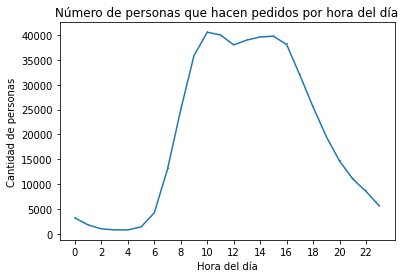

In [49]:
# Ahora se grafican el número de personas que hicieron pedidos para cada hora del día
# Para esto se usa el método plot() de Pandas y pyplot de matplotlib (plt) para mostrar el gráfico
hour_of_day_orders.plot(x='order_hour_of_day', 
                       title= 'Número de personas que hacen pedidos por hora del día',
                       xlabel= 'Hora del día',
                       ylabel='Cantidad de personas',
                       style=',-',
                       xticks= range(0,24,2)
                       )
plt.show()

Escribe aquí tus conclusiones  
<span style="color:darkgreen">
La hora en la que las personas hacen un mayor número de pedidos es a las 9, asimismo en el intervalo entre las 9 y las 16 hay un mayor número de personas que hicieron pedidos respecto a las otras horas
</span>.

### [A3] ¿Qué día de la semana compran víveres las personas?

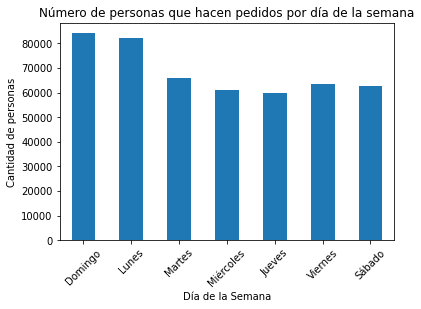

In [50]:
# Ahora se grafican el número de personas que hicieron pedidos para cada día de la semana
# Para esto se usa el método plot() de Pandas y pyplot de matplotlib (plt) para mostrar el gráfico
day = [0,1,2,3,4,5,6]
# Lista con el nombre de los días de la semana, cada nombre de la semana corresponde a un elemento de la lista day, en elorden que aparecen
week_day = ['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']
week_day_orders.plot(x= 'order_dow',
                     kind= 'bar',
                     title= 'Número de personas que hacen pedidos por día de la semana',
                     xlabel= 'Día de la Semana',
                     ylabel='Cantidad de personas',
                     rot= 45
                       )

plt.xticks(day, week_day)
plt.show()

Escribe aquí tus conclusiones  
<span style="color:darkgreen">
Los días Domingo y Lunes, que es el inicio de semana, hay un mayor número de personas que hicieron pedidos.
</span>.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Perfecto.
</div>

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [51]:
df_instacart_orders['days_since_prior_order'].max()

30.0

In [52]:
df_instacart_orders['days_since_prior_order'].describe()

count    450135.000000
mean         11.101814
std           9.190004
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64

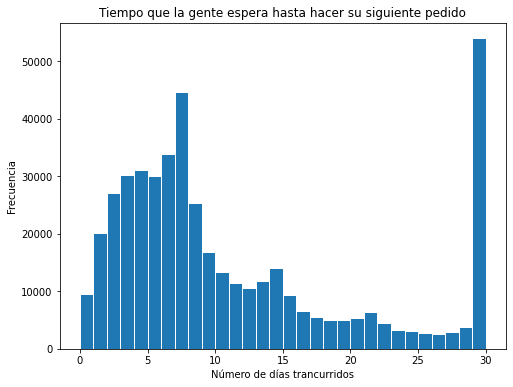

In [53]:
df_instacart_orders['days_since_prior_order'].plot(kind= 'hist', 
                                                   bins=30,
                                                  title= 'Tiempo que la gente espera hasta hacer su siguiente pedido',
                                                  edgecolor ='white',
                                                  figsize= [8,6])

plt.ylabel('Frecuencia')
plt.xlabel('Número de días trancurridos')
plt.show()

Escribe aquí tus conclusiones  
<span style="color:darkgreen">
Hay un pico que es para 30 días transcurridos desde que el cliente hizo su último pedido, el cual es el valor de días máximo que transcurren,. Mientras que el valor mínimo de los días transcurridos es 0, el cual no tiene muchos valores.
</span>.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [54]:
# Se crean dos DataFrames uno en donde se tengan los valores sólo para el día miércoles y otro para el día sábado
df_wed_orders = df_instacart_orders[(df_instacart_orders['order_dow'] == 3)]
df_sat_orders = df_instacart_orders[(df_instacart_orders['order_dow'] == 6)]

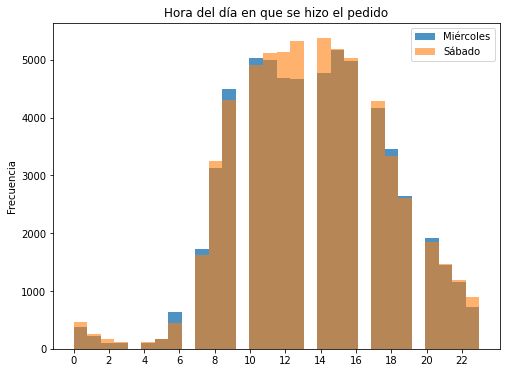

In [55]:
# A partir de los DataFrames df_wed_orders y df_sat_orders se crea sus respectivos histogramas en el mismo gráfico
df_wed_orders['order_hour_of_day'].plot(kind='hist',
                                        bins= 30, 
                                        alpha= 0.8,
                                        figsize= [8,6],
                                        xticks= range(0,24,2)
                                       )
df_sat_orders['order_hour_of_day'].plot(kind='hist', 
                                        bins= 30, 
                                        alpha= 0.6,
                                        figsize= [8,6],
                                        xticks= range(0,24,2)
                                       )
plt.title('Hora del día en que se hizo el pedido') # para colocar un título
plt.ylabel('Frecuencia') # Para nombrar el eje y
plt.legend(['Miércoles', 'Sábado']) # para colocar las leyendas del gráfico
plt.show()

Escribe aquí tus conclusiones  
<span style="color:darkgreen">
Las distribuciones de los datos para el día miércoles y sábado son muy similares, el intervalo de las horas en las que se hicieron más pedidos fueron entre las 10 y 16. Al parecer en estos días se realizan aproximadamente el mismo número de pedidos en las mismas horas
</span>.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [56]:
# se crea un DataFrame que sólo tenga las columnas 'order_number' y 'user_id'
df_ordernum_user = df_instacart_orders[['order_number','user_id']]
df_ordernum_user.head() # se muestran las primeras 5 filas

,order_number,user_id
0,11,183418
1,5,163593
2,4,39980
3,56,82516
4,2,196724


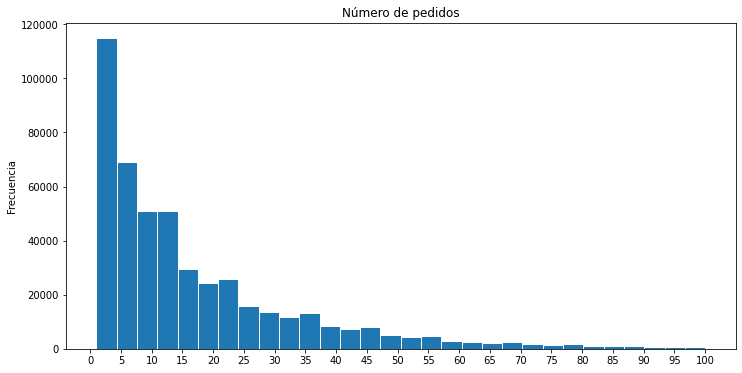

In [57]:
# se crea un histograma para observar la distribución para el número de pedidos por cliente
df_ordernum_user['order_number'].plot(kind='hist', 
                       bins= 30,
                       figsize= [12,6],
                       edgecolor ='white',
                       xticks= range(0,105,5)
                      )
plt.title('Número de pedidos')
plt.ylabel('Frecuencia')
plt.show()

Escribe aquí tus conclusiones  
<span style="color:darkgreen">
La cantidad de pedidos que hacen la mayoria de los clientes son menos de 5.  
Hay menos clientes que hacen más de 5 pedidos
</span>.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

<span style="color:darkgreen">Primero se mostrarán con el método ``head()`` las primeras 5 filas de los DataFrames ``df_products`` y ``df_order_products`` para identificar cuáles columnas tienen en común y posteriormente hacer un merge de estos Datasets.
</span>

In [58]:
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,CHOCOLATE SANDWICH COOKIES,61,19
1,2,ALL-SEASONS SALT,104,13
2,3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,94,7
3,4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,38,1
4,5,GREEN CHILE ANYTIME SAUCE,5,13


In [59]:
df_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [60]:
# Se hace el primer merge con las DataFrames df_products y df_order_products, la columna en común es el 'product_id'
products_and_orders = df_products.merge(df_order_products, on= 'product_id')
products_and_orders

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered
0,1,CHOCOLATE SANDWICH COOKIES,61,19,1104373,11,1
1,1,CHOCOLATE SANDWICH COOKIES,61,19,1774977,4,1
2,1,CHOCOLATE SANDWICH COOKIES,61,19,652770,10,0
3,1,CHOCOLATE SANDWICH COOKIES,61,19,1000035,6,1
4,1,CHOCOLATE SANDWICH COOKIES,61,19,1679949,9,0
...,...,...,...,...,...,...,...
4545002,49694,BURRITO- STEAK & CHEESE,38,1,3034802,10,0
4545003,49694,BURRITO- STEAK & CHEESE,38,1,3175081,3,0
4545004,49694,BURRITO- STEAK & CHEESE,38,1,694132,2,0
4545005,49694,BURRITO- STEAK & CHEESE,38,1,2843165,5,0


In [61]:
# Se agrupan las columas de product_id y el nombre del producto ('product_name') y se contabilizan el las ordenes para cada producto
products_and_orders.groupby(['product_id', 'product_name'])['order_id'].count().sort_values(ascending= False).head(20)

product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATOES      11781
Name: order_id, dtype: int64

Escribe aquí tus conclusiones  
<span style="color:darkgreen">  
Los 20 productos más populares entre los clientes son frutas y verduras, a excepción de la leche, lo cuál podría indicar que son parte fundamental de su canasta básica para su alimentación
</span>.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

<span style="color: darkgreen">Primero se muestran con el método ``head()`` los DataFrame de ``df_instacart_orders`` y ``df_order_products``, los cuales son de utilidad para conocer la cantidad de artículos por pedido, la columna que tienen en común es ``order_id``, la cual se usará más adelante para hacer un merge de ambos Dataset.
</span>

In [62]:
# 
df_instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [63]:
df_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [64]:
# Se hace el merge de los DataFrames
merged_orders_products = df_instacart_orders.merge(df_order_products, on= 'order_id')
merged_orders_products.head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1515936,183418,11,6,13,30.0,19048,1,1
1,1515936,183418,11,6,13,30.0,47766,3,1
2,1515936,183418,11,6,13,30.0,45066,9,0
3,1515936,183418,11,6,13,30.0,24082,11,0
4,1515936,183418,11,6,13,30.0,24363,4,0
5,1515936,183418,11,6,13,30.0,36792,2,1
6,1515936,183418,11,6,13,30.0,29270,5,1
7,1515936,183418,11,6,13,30.0,43352,10,0
8,1515936,183418,11,6,13,30.0,28553,7,1
9,1515936,183418,11,6,13,30.0,24852,8,1


In [65]:
# Se agrupan los pedidos y se contabilizan el número de de productos para cada pedido
products_by_order = merged_orders_products.groupby('order_id')['product_id'].count()
products_by_order.sort_values()

order_id
3421079      1
1288686      1
1288764      1
1288825      1
1288873      1
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 450046, dtype: int64

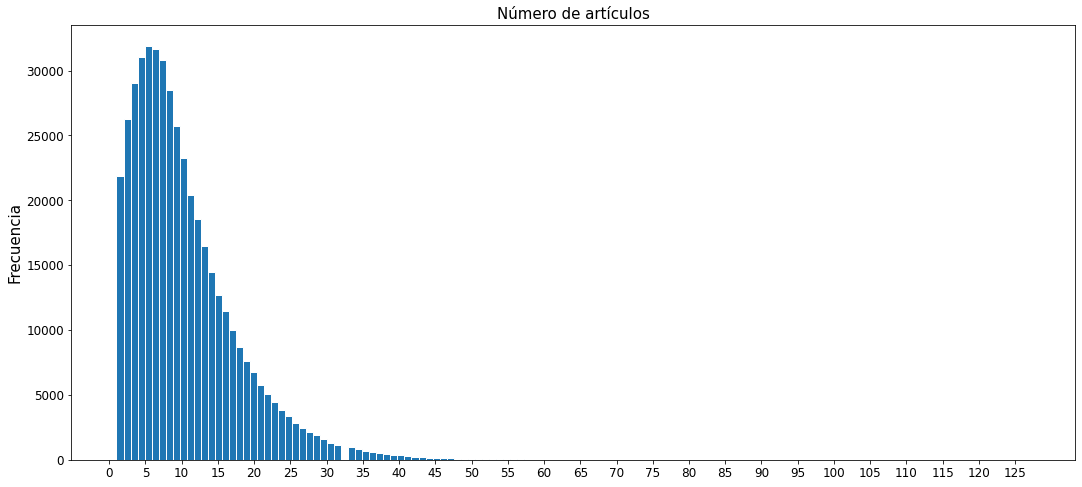

In [66]:
# Ahora se grafica un histograma para observar la distribución de la cantidad de artículos por cada orden
products_by_order.plot(kind= 'hist',
                       bins= 130,
                       figsize= [18,8],
                       xticks= range(0,130,5),
                       edgecolor ='white',
                       fontsize= 12
                      )
plt.title('Número de artículos', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)
plt.show()

Escribe aquí tus conclusiones  
<span style="color: darkgreen">De acuerdo con el histograma la cantidad de artículos que compran o que se realiza por pedidos son entre 5 y 6, ya que tienen los picos más grandes.</span>

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

<span style="color: darkgreen">Los DataFrame de ``df_products`` y ``df_order_products`` tienen la información para conocer los 20 artículos que más se vuelven a pedir, la columna que tienen en común es ``product_id``.  
Es importante mencionar que en la sección **7.7 [B3]** ya se hizo un merge de estos DataFrames, el cual es ``products_and_orders``.
</span>

In [67]:
# DataFrame resultante de la unión de los DataFrame de df_products y df_order_products
products_and_orders.head()

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered
0,1,CHOCOLATE SANDWICH COOKIES,61,19,1104373,11,1
1,1,CHOCOLATE SANDWICH COOKIES,61,19,1774977,4,1
2,1,CHOCOLATE SANDWICH COOKIES,61,19,652770,10,0
3,1,CHOCOLATE SANDWICH COOKIES,61,19,1000035,6,1
4,1,CHOCOLATE SANDWICH COOKIES,61,19,1679949,9,0


<span style="color: darkgreen">Recordatorio: en la columna ``reordered`` si es **0**  el cliente nunca ha pedido este producto antes, **1** si lo ha pedido.
</span>

In [68]:
# Se emplea el método query() para hacer un filtrado del DataFrame products_and_orders, en dónde la columna 'reordered' sea 1
# Y únicamente se incluyen en DatFrame resultante las columnas de 'product_id','product_name' y'reordered'
df_reordered = products_and_orders.query('reordered == 1')[['product_id','product_name','reordered']]
df_reordered.sample(5)

,product_id,product_name,reordered
4082964,45066,HONEYCRISP APPLE,1
873383,10749,ORGANIC RED BELL PEPPER,1
2328003,25936,ENVIROKIDZ GLUTEN FREE & WHEAT FREE GORILLA MU...,1
2616152,28438,PORK JERKY GRILLED SWEET TERIYAKI,1
3446338,38383,ORGANIC WHITE ONIONS,1


In [69]:
# Ahora se agrupan el ID de los productos y el nombre del producto, y se contabilizan las veces que se ha pedido cada producto
# Los valores se ordenan con sort_values() de mayor a menor y se muestran con head() los 20 artículos que más se vuelven a ordenar 
top_20_reordered_products = df_reordered.groupby(['product_id','product_name'])['reordered'].count().sort_values(ascending=False).head(20)
top_20_reordered_products

product_id  product_name            
24852       BANANA                      55763
13176       BAG OF ORGANIC BANANAS      44450
21137       ORGANIC STRAWBERRIES        28639
21903       ORGANIC BABY SPINACH        26233
47209       ORGANIC HASS AVOCADO        23629
47766       ORGANIC AVOCADO             18743
27845       ORGANIC WHOLE MILK          16251
47626       LARGE LEMON                 15044
27966       ORGANIC RASPBERRIES         14748
16797       STRAWBERRIES                13945
26209       LIMES                       13327
22935       ORGANIC YELLOW ONION        11145
24964       ORGANIC GARLIC              10411
45007       ORGANIC ZUCCHINI            10076
49683       CUCUMBER KIRBY               9538
28204       ORGANIC FUJI APPLE           8989
8277        APPLE HONEYCRISP ORGANIC     8836
39275       ORGANIC BLUEBERRIES          8799
5876        ORGANIC LEMON                8412
49235       ORGANIC HALF & HALF          8389
Name: reordered, dtype: int64

Escribe aquí tus conclusiones  
<span style="color: darkgreen">Los 20 artículos que más vuelven a pedir los usuarios o usuarias principalmente son los productos frescos, a excepción de la leche (ORGANIC WHOLE MILK) y la media crema (ORGANIC HALF & HALF), también varios de los productos frescos son orgánicos.
</span>

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

<span style="color: darkgreen">Nuevamente se empleará el DataFrame ``products_and_orders`` que se creó con un merge en la sección **7.7 [B3]**, que tiene la información de los productos y de los artículos pedidos en un pedido.
</span>

In [70]:
# Ahora se agrupan los productos por su nombre y se contabilizan todos sus valores de las columnas, hayan sido pedidos nuevamente o no
# El Series resultante se asigna a total_ordered_products
total_ordered_products = products_and_orders.groupby(['product_id','product_name'])['reordered'].count()
total_ordered_products.head()

product_id  product_name                                                     
1           CHOCOLATE SANDWICH COOKIES                                           280
2           ALL-SEASONS SALT                                                      11
3           ROBUST GOLDEN UNSWEETENED OOLONG TEA                                  42
4           SMART ONES CLASSIC FAVORITES MINI RIGATONI WITH VODKA CREAM SAUCE     49
7           PURE COCONUT WATER WITH ORANGE                                         2
Name: reordered, dtype: int64

In [71]:
# Se emplea el DataFrame df_reordered que tiene solo los artículos que se volvieron a pedir
# Ahora se agrupan los productos por su nombre y se contabilizan todas los valores de la columna 'reordered'
# El Series resultante se asigna a ordered_again_product
ordered_again_product = df_reordered.groupby(['product_id', 'product_name'])['reordered'].count()
ordered_again_product.head()

product_id  product_name                                                     
1           CHOCOLATE SANDWICH COOKIES                                           158
3           ROBUST GOLDEN UNSWEETENED OOLONG TEA                                  31
4           SMART ONES CLASSIC FAVORITES MINI RIGATONI WITH VODKA CREAM SAUCE     25
7           PURE COCONUT WATER WITH ORANGE                                         1
8           CUT RUSSET POTATOES STEAM N' MASH                                      6
Name: reordered, dtype: int64

In [72]:
# Ahora los Series total_ordered_products y ordered_again_product se concatenan con concat, con axis= 'columns' para asegurarnos de que se combinaran como columnas
reordered_by_products = pd.concat([total_ordered_products, ordered_again_product], axis='columns')
# Se renombran las columnas
reordered_by_products.columns = ['total_ordered', 'reps_orders']
# con reset_index() se reinicia el índice del DataFrame reordered_by_products
reordered_by_products.reset_index(inplace= True)

In [73]:
reordered_by_products.head()

,product_id,product_name,total_ordered,reps_orders
0,1,CHOCOLATE SANDWICH COOKIES,280,158.0
1,2,ALL-SEASONS SALT,11,NaN
2,3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,42,31.0
3,4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,49,25.0
4,7,PURE COCONUT WATER WITH ORANGE,2,1.0


<span style="color: darkgreen">El DataFrame ``reordered_by_products`` tiene dos columnas, ``total_ordered`` que es el total de pedidos y ``reps_orders`` que es el número de veces que se vuelve a pedir. Ahora se crea una nueva columna para calcular la tasa de repetición para cada producto. Además, en la columna ``reps_orders`` los valores ausente significa que no se volvieron a ordenar por lo que estos valores se llenan con 0.
</span>

In [74]:
# Se llenan los vlores ausente de la columna 'reps_orders' con 0
reordered_by_products['reps_orders'].fillna(0, inplace= True)

In [75]:
# Ahora se crea una nueva columna para calcular la tasa de repetición, dividiento número de repeticiones de pedido entre el total de pedidos
reordered_by_products['rep_ratio'] = reordered_by_products['reps_orders'] / reordered_by_products['total_ordered']
reordered_by_products

,product_id,product_name,total_ordered,reps_orders,rep_ratio
0,1,CHOCOLATE SANDWICH COOKIES,280,158.0,0.564286
1,2,ALL-SEASONS SALT,11,0.0,0.000000
2,3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,42,31.0,0.738095
3,4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,49,25.0,0.510204
4,7,PURE COCONUT WATER WITH ORANGE,2,1.0,0.500000
...,...,...,...,...,...
45568,49690,HIGH PERFORMANCE ENERGY DRINK,5,4.0,0.800000
45569,49691,ORIGINAL PANCAKE & WAFFLE MIX,72,31.0,0.430556
45570,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,12,5.0,0.416667
45571,49693,SPRING WATER BODY WASH,25,11.0,0.440000


In [76]:
# se ordenan de mayor a menor con base a la columna rep_ratio y se muestran 20 filas con head()
reordered_by_products.sort_values(by= ['rep_ratio'], ascending= False).head(20)

,product_id,product_name,total_ordered,reps_orders,rep_ratio
13453,14721,BONE STRENGTH TAKE CARE,1,1.0,1.0
19195,20949,VANILLA SANDWICH COOKIES,3,3.0,1.0
6136,6723,PALMIERS- PETITE,10,10.0,1.0
6144,6732,NATURALLY SPARKLING MINERAL WATER,3,3.0,1.0
41319,45088,CALIFORNIA DILL POLLEN & GARLIC GOAT CHEESE & ...,1,1.0,1.0
41310,45078,POMEGRANATEA,1,1.0,1.0
19258,21016,PARCHMENT LINED 8 IN X 3.75 IN X 2.5 IN PANS,1,1.0,1.0
19248,21005,PEANUT BUTTER PIE ICE CREAM,2,2.0,1.0
32273,35192,CHOCOLATE SOY MILK SINGLES,2,2.0,1.0
32277,35197,MOCHA CHOCOLATE CHIP ORGANIC NON-DAIRY FROZEN...,1,1.0,1.0


<span style="color: darkgreen">Para mostrar la distribución de la tasa de repetición para los productos se grafica un histograma. 
</span>

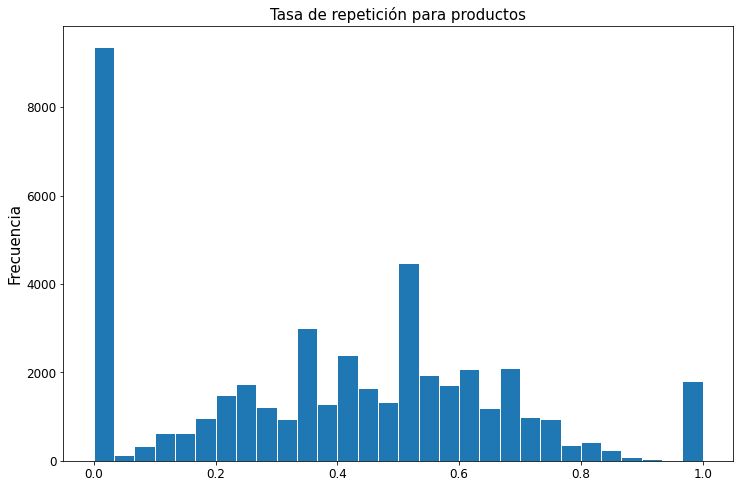

In [77]:
reordered_by_products['rep_ratio'].plot(kind= 'hist',
                       bins= 30,
                       figsize= [12,8],
                       edgecolor ='white',
                       fontsize= 12
                      )

plt.title('Tasa de repetición para productos', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)
plt.show()

Escribe aquí tus conclusiones  
<span style="color: darkgreen">La tasa de repetición para los primeros 20 artículos es de 1, lo que significa que de todas veces que se pidió, el 100% se volvió a pedir. Además, estos 20 artículos son muy variados, no sólo son alimentos. 
De acuerdo al histograma el pico mayor esta en 0, lo significa que el artículo no vuelve a ser pedido, el segundo pico de mayor altura esta alrdedor de 0.5, lo que quiere decir que el 50 % de los productos se vuelve a pedir.
</span>

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

<span style="color: darkgreen">El DataFrame ``products_and_orders`` tiene información del producto y la información del artículo pedido en un pedido. Ahora se hace un merge con el DataFrame ``instacart_orders`` que tiene información sobre los usurios.
</span>

In [78]:
# Se hace un merge para unir los DataFrames, la columna en común con los IDs es 'order_id'
products_orders_users = products_and_orders.merge(df_instacart_orders, on= 'order_id')
products_orders_users.head()

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,CHOCOLATE SANDWICH COOKIES,61,19,1104373,11,1,205262,29,3,14,7.0
1,4778,WHEAT THINS REDUCED FAT CRACKERS,78,19,1104373,9,1,205262,29,3,14,7.0
2,9387,GRANNY SMITH APPLES,24,4,1104373,7,1,205262,29,3,14,7.0
3,11869,STRING CHEESE,21,16,1104373,4,1,205262,29,3,14,7.0
4,12909,CRUNCHY FLAMIN' HOT,107,19,1104373,13,1,205262,29,3,14,7.0


In [79]:
orders_count_user = products_orders_users.groupby('user_id')['reordered'].count().sort_values(ascending= False)
orders_count_user

user_id
103634    580
33731     540
137629    526
23371     506
164055    504
         ... 
82057       1
114847      1
178865      1
34774       1
123119      1
Name: reordered, Length: 149626, dtype: int64

In [80]:
reordered_count_user = products_orders_users.query('reordered == 1').groupby('user_id')['reordered'].count().sort_values(ascending= False)
reordered_count_user

user_id
103634    477
164055    449
137629    444
33731     437
59819     436
         ... 
77356       1
77348       1
193229      1
77324       1
2           1
Name: reordered, Length: 132991, dtype: int64

In [81]:
# Ahora los Series orders_count_user y reordered_count_user se concatenan con concat, con axis= 'columns' para asegurarnos de que se combinaran como columnas
reordered_by_user = pd.concat([orders_count_user, reordered_count_user], axis='columns')
# Se renombran las columnas
reordered_by_user.columns = ['total_ordered', 'reps_orders']
# # con reset_index() se reinicia el índice del DataFrame reordered_by_user
reordered_by_user.reset_index(inplace= True)

In [82]:
reordered_by_user.head()

,user_id,total_ordered,reps_orders
0,2,26,1.0
1,4,2,NaN
2,5,12,8.0
3,6,4,NaN
4,7,14,13.0


<span style="color: darkgreen"> En la columna ``reps_orders`` los valores ausente significa que no se volvieron a ordenar por lo que estos valores se llenan con 0.
</span>

In [83]:
# Se llenan los vlores ausente de la columna 'reps_orders' con 0
reordered_by_user['reps_orders'].fillna(0, inplace= True)

In [84]:
# Ahora se crea una nueva columna para calcular la tasa de repetición por usuario, dividiento número de repeticiones de pedido entre el total de pedidos
reordered_by_user['rep_ratio'] = reordered_by_user['reps_orders'] / reordered_by_user['total_ordered']
reordered_by_user.head(10)

,user_id,total_ordered,reps_orders,rep_ratio
0,2,26,1.0,0.038462
1,4,2,0.0,0.000000
2,5,12,8.0,0.666667
3,6,4,0.0,0.000000
4,7,14,13.0,0.928571
5,11,15,3.0,0.200000
6,12,12,3.0,0.250000
7,13,23,13.0,0.565217
8,14,61,22.0,0.360656
9,15,13,7.0,0.538462


<span style="color: darkgreen">Para mostrar la distribución de la proporción de los productos que los usuarios o usuarias ya los habían pedido se grafica un histograma. 
</span>

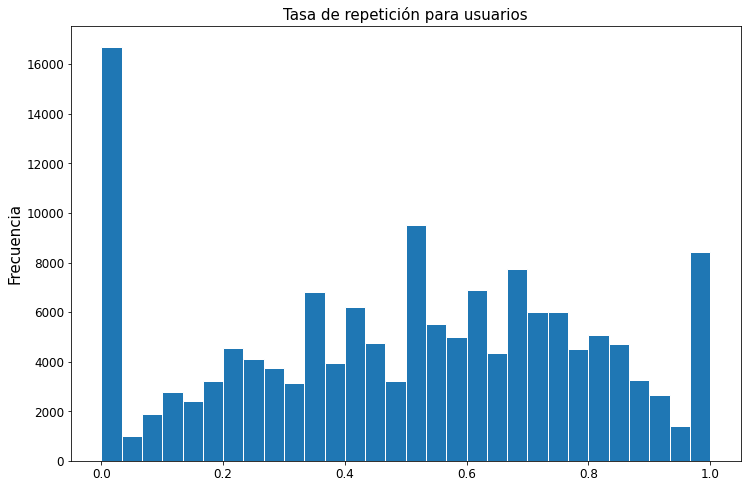

In [85]:
reordered_by_user['rep_ratio'].plot(kind= 'hist',
                       bins= 30,
                       figsize= [12,8],
                       edgecolor ='white',
                       fontsize= 12
                      )

plt.title('Tasa de repetición para usuarios', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)
plt.show()

Escribe aquí tus conclusiones  
<span style="color: darkgreen"> 
De acuerdo con el histograma el pico mayor esta en 0, lo significa que el artículo no vuelve a ser pedido por los usuarios o usuarias, el segundo pico de mayor altura esta alrdedor de 0.5, lo que quiere decir que el 50 % de los productos se volvieron a pedir por los usuarios.
</span>

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

<span style="color: darkgreen">Nuevamente se emplea el DataFrame ``products_and_orders`` que se creó con un merge en la sección **7.7 [B3]**, que tiene la información de los productos y de los artículos pedidos en un pedido.
</span>

In [86]:
# Priemras filas del Dataframe products_and_orders
products_and_orders.head()

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered
0,1,CHOCOLATE SANDWICH COOKIES,61,19,1104373,11,1
1,1,CHOCOLATE SANDWICH COOKIES,61,19,1774977,4,1
2,1,CHOCOLATE SANDWICH COOKIES,61,19,652770,10,0
3,1,CHOCOLATE SANDWICH COOKIES,61,19,1000035,6,1
4,1,CHOCOLATE SANDWICH COOKIES,61,19,1679949,9,0


In [87]:
# Se aplica un filtro con el método query() sobre la columna 'add_to_cart_order' en donde sólo devuelva los valores igual a 1
# Al resultado de este filtro se agrupa por el ID del producto y el nombre del producto y se cuentan los valores de la 
# columna 'add_to_cart_order' con count()
# Al resultado del conteo se aplica el método sort_values() para que ordene los valores de mayor a menor y se muestran los 20 primeros productos
products_and_orders.query('add_to_cart_order == 1').groupby(['product_id','product_name'])['add_to_cart_order'].count().sort_values(ascending= False).head(20)

product_id  product_name               
24852       BANANA                         15562
13176       BAG OF ORGANIC BANANAS         11026
27845       ORGANIC WHOLE MILK              4363
21137       ORGANIC STRAWBERRIES            3946
47209       ORGANIC HASS AVOCADO            3390
21903       ORGANIC BABY SPINACH            3336
47766       ORGANIC AVOCADO                 3044
19660       SPRING WATER                    2336
16797       STRAWBERRIES                    2308
27966       ORGANIC RASPBERRIES             2024
44632       SPARKLING WATER GRAPEFRUIT      1914
49235       ORGANIC HALF & HALF             1797
47626       LARGE LEMON                     1737
196         SODA                            1733
38689       ORGANIC REDUCED FAT MILK        1397
26209       LIMES                           1370
12341       HASS AVOCADOS                   1340
5785        ORGANIC REDUCED FAT 2% MILK     1310
27086       HALF & HALF                     1309
43352       RASPBERRIES      

Escribe aquí tus conclusiones  
<span style="color: darkgreen">Los artículos que los usuarios o usuarias ponen primero en sus carritos principalmente son frutas y verduras, hay otros artículos como refresco, agua y leche. Todos los artículos son alimentos, no hay otro artículo que no sea un alimento y/o bebida.
</span>

<div class="alert alert-block alert-info">
<b>Resumen general de los pasos realizados:</b> <a class="tocSkip"></a>
 
Para trabajar con todo el conjunto de datos se importaron las librerías necesarias y se importaron los Datasets. Después se hizo un exploración de cada DatFrame con ``info()`` para detectar de manera general la cantidad de datos, columnas y valores ausentes. Posteriormente, los datos se procesaron para cada DataFrame encontrando y eliminando los valores duplicados y ausentes, así como detectar el tipo de dato de las columnas.  
    
En algunos casos fue necesario aplicar algunos filtros, usando máscaras booleanas o el método ``query()``. También se crearon varios gráficos con la ayuda del método ``plot()`` de Pandas y para visualizarlos se empleó Pyplot de la librería Matplotlib, algunos de los gráficos que se crearon fueron histogramas, gráficos de barras y de líneas.  
    
También se tuvieron que realizar algunos ``merge()`` para unir diferentes DataFrames, ya que la información para hacer los análisis está en varios conjunto de datos. De igual forma se utilizó ``concat()`` para unir algunos Series, porque estos se complementaban para completar la información y a partir del DataFrame resultante crear otra columna.  
    

<b>Conclusiones:</b> <a class="tocSkip"></a>
    
Al importar los Dataset se encontró que el archivo csv tenía como separador un ';', entonces se indicó al importarlos el tipo de separador.  Algunos DataFrame tenían valores duplicados y se eliminaron, no obstante, en otros casos se decidió no hacerlo. También se encontraron valores ausentes, los cuales se llenaron con información que se consideró adecuada para hacerla, ya que si se eliminaban se perdería mucha información. En otros casos, se optó por no eliminar los datos ausentes y dejarlos así.  
    
De acuerdo al análisis, los usuarios y usuarias realizan más pedidos entre las 9:00 y 16:00 horas, asimismo los días con mayor cantidad de compras son los domingos y lunes. Por otra parte, los días miércoles y sábados los pedidos son muy similares en los mismos horarios.  
    
Aproximadamente el mayor número de días transcurridos que esperan los usuarios y usuarias para hacer el siguiente pedido es 30, sin embargo, hay otro grupo en el cual transcurren alrededor de 8 días para que hagan el siguiente pedido.  
    
La mayoría de clientes y clientas hacen menos de 5 pedidos.  
    
Los 20 productos más populares entre los usuarios y usuarias son los productos frescos, varios de estos son orgánicos.  
    
En cada pedido la cantidad de artículos que se compran son entre 5 y 6, de acuerdo con los resultados al menos uno de estos artículos podría ser un producto fresco, agua, soda o leche, ya que son los productos que ponen primero en sus carritos.  
    
Los 20 productos que vuelven a pedirse con más frecuencia son de la sección o departamento de frutas y verduras.  
    
Del total de las veces que los productos se vuelven a pedir, el 50% de estos se vuelve a ordenar. Por su parte, en su mayoría el 0 % de las veces los usuarios y usuarias vuelven a pedir el artículo, sin embargo, hay otros clientes que el 50 % vuelve a pedir el producto.  
</div>